In [1]:
# Datahåndtering
import numpy as np
import pandas as pd

# NLP
import spacy
import string
from spacy.tokenizer import Tokenizer

# Web scraping
from bs4 import BeautifulSoup as bs
import requests

# Visualisering
import matplotlib
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Sæt visualiseringsindstillinger
%matplotlib inline

# Indlæs sprogmodel
nlp = spacy.load("da_core_news_sm")

(-0.5, 399.5, 199.5, -0.5)

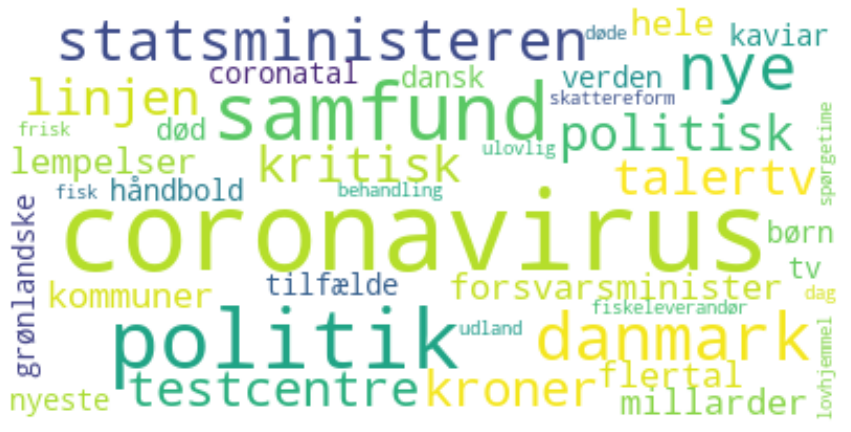

In [4]:
url = "https://nyheder.tv2.dk/"
url_content = requests.get(url).content

tv2_soup = bs(url_content)
texts = tv2_soup.find_all("a", class_ = "o-teaser_link")
texts = [text.get_text() for text in texts]
text = ''.join(texts)

doc = nlp(text)
words = []

pos_tag = ['PROPN', 'ADJ', 'NOUN']
stopwords = list(nlp.Defaults.stop_words) + ["LIVE"]
punctuation = string.punctuation + "”"

for token in doc:
    
    if(token.text in stopwords or token.text in punctuation):
        continue
        
    if(token.pos_ in pos_tag):
        words.append(token.text.lower())
        
counts = pd.Series(words).value_counts()
counts = counts[counts > 1]

wc = WordCloud(background_color="white")
wc.fit_words(counts)

plt.figure(figsize=(15,15))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")